In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
import warnings
import pandas as pd
import pickle

In [2]:
days = pd.read_csv("Incident_Infections_10000.csv").to_numpy()[:,1:]

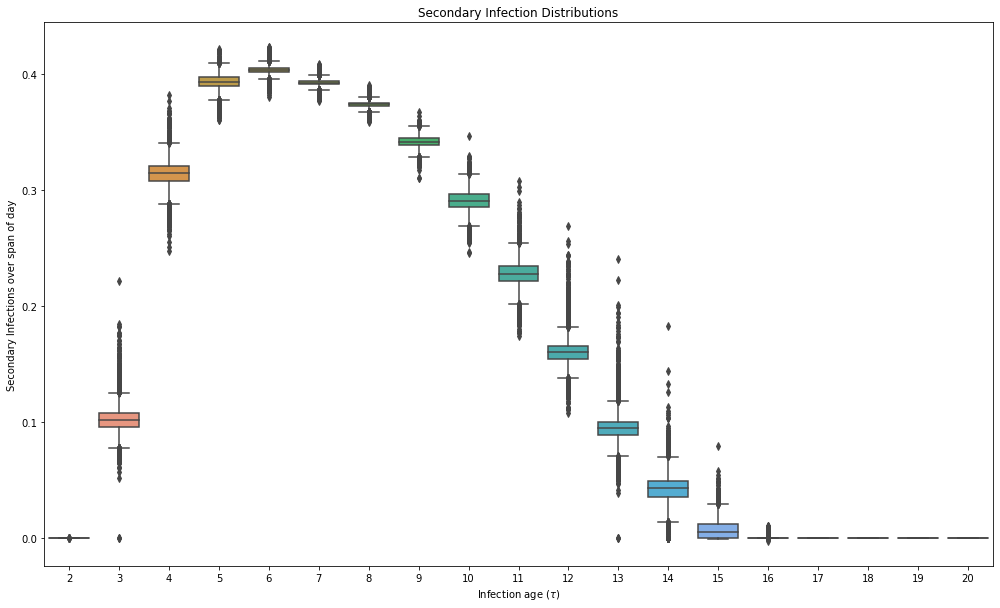

In [3]:
fig, ax = plt.subplots(figsize=(17,10))
sns.boxplot(data=days, orient='v', ax = ax)
plt.xticks(np.arange(0,19),np.arange(2,21))
plt.title("Secondary Infection Distributions")
plt.xlabel(r"Infection age ($\tau$)")
plt.ylabel("Secondary Infections over span of day")
plt.show()

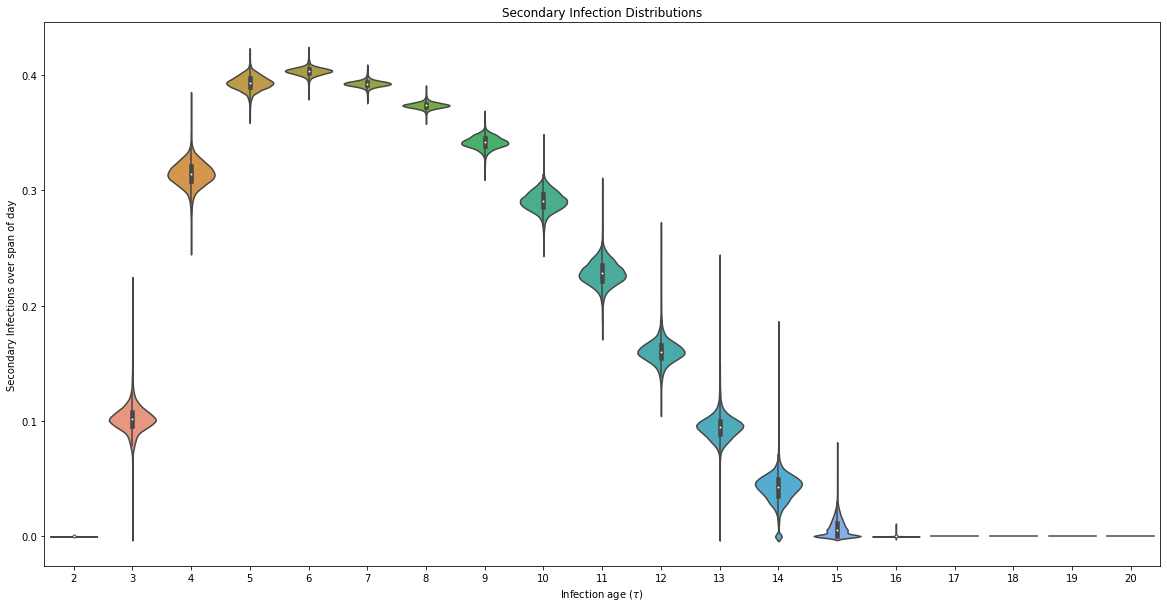

In [4]:
plt.figure(figsize=(20,10))
sns.violinplot(data=days, scale='width')
plt.xticks(np.arange(0,19),np.arange(2,21))
plt.title("Secondary Infection Distributions")
plt.xlabel(r"Infection age ($\tau$)")
plt.ylabel("Secondary Infections over span of day")
plt.show()

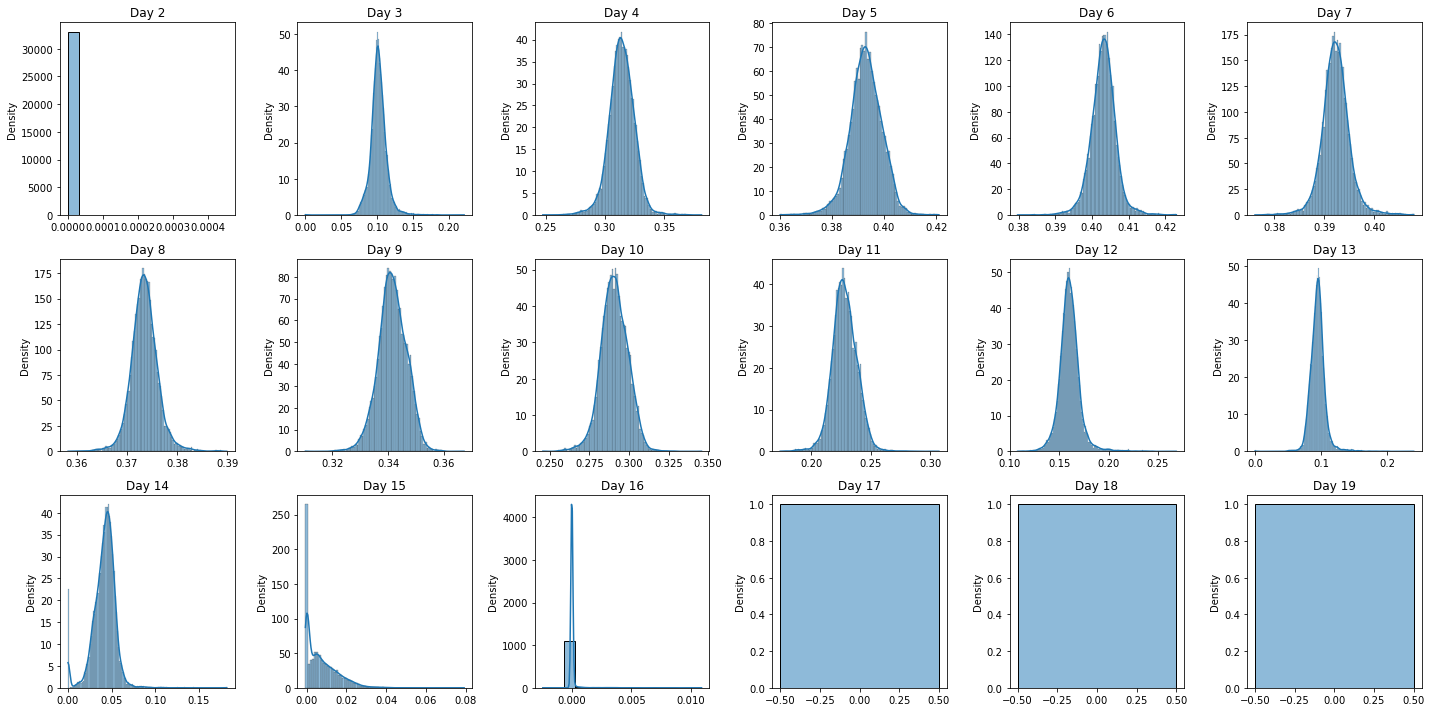

In [5]:
fig, axes = plt.subplots(3,6,figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        sns.histplot(days[:,i], ax = ax, kde=True, stat='density', line_kws={'color':'r'})
        ax.set_title(f"Day {i+2}")
    
plt.tight_layout()

In [6]:
pd.DataFrame(days, columns=np.arange(2,21)).describe(percentiles=[0.5])[1:].T

,mean,std,min,50%,max
2,5.266398e-08,0.000005,0.000000,0.000000,0.000453
3,1.018436e-01,0.011187,0.000000,0.101429,0.221241
4,3.141254e-01,0.010776,0.247710,0.314091,0.381487
5,3.930143e-01,0.006194,0.360172,0.393036,0.421049
6,4.030816e-01,0.003435,0.379707,0.403146,0.422981
7,3.922913e-01,0.002822,0.376135,0.392233,0.407911
8,3.734844e-01,0.002711,0.358269,0.373426,0.389876
9,3.415070e-01,0.005099,0.310369,0.341442,0.367225
10,2.908046e-01,0.008556,0.245543,0.290688,0.345869
11,2.282234e-01,0.010550,0.173959,0.227785,0.307401


In [7]:
days = pickle.load(open("DistDayData.p","rb"))
for day in days:
    print(day['day'])
    print(f"   {day['dist'].name} -> params:",*day['params'],"\n")

3
   johnsonsu -> params: -0.13290344181231845 1.4127149544059694 0.10036374205341453 0.011868071263659529 

4
   t -> params: 6.778013672026258 0.3142219662067285 0.009017219400630518 

5
   t -> params: 9.256320465656998 0.3930884793341114 0.005477062980100349 

6
   burr -> params: 229.82543441358868 0.8514478725053161 0.00667333720093865 0.3968548798349004 

7
   t -> params: 4.430723707904956 0.39225219141650414 0.0021117141227555147 

8
   t -> params: 4.935147538623328 0.3734376731242338 0.0021017165796676524 

9
   t -> params: 15.68795223229554 0.34154191047972027 0.004758069953755233 

10
   lognorm -> params: 0.021220393307518938 -0.11183256714862902 0.4026526545733604 

11
   johnsonsu -> params: -0.18403970091290742 2.103574184133505 0.22631618655442298 0.019537303387810963 

12
   t -> params: 3.5453703808244414 0.16000620089354411 0.00722650534836833 

13
   hypsecant -> params: 0.0946592278278428 0.006730363531954884 

14
   burr -> params: 48.18253531445357 0.412255841

In [8]:
def plot_day(n,day_list, ax=None):
    matches = list(filter(lambda x: x['day']==n, days))
    if len(matches) != 1:
        raise ValueError("Day not in dataset")
    
    data_dict = matches[0]
    data = data_dict['data']
    dist = data_dict['dist']
    params = data_dict['params']
    xs = np.linspace(data.min(),data.max())
    ys = dist.pdf(xs,*params)
    if ax:
        ax.hist(data, density=True, bins='auto')
        ax.plot(xs,ys,'r--')
        ax.set_title(f"Day {n}")
    else:
        plt.hist(data, density=True, bins='auto')
        plt.plot(xs,ys,'r--')
        plt.title(f"Day {n}")
        
def plot_day(n,day_list, ax=None):
    matches = list(filter(lambda x: x['day']==n, days))
    if len(matches) != 1:
        raise ValueError("Day not in dataset")
    
    data_dict = matches[0]
    data = data_dict['data']
    dist = data_dict['dist']
    params = data_dict['params']
    xs = np.linspace(data.min(),data.max())
    ys = dist.pdf(xs,*params)
    if ax:
        sns.histplot(data,stat='density',ax=ax)
        ax.plot(xs,ys,'r--')
        ax.set_title(f"Day {n}")
    else:
        plt.hist(data, density=True, bins='auto')
        plt.plot(xs,ys,'r--')
        plt.title(f"Day {n}")

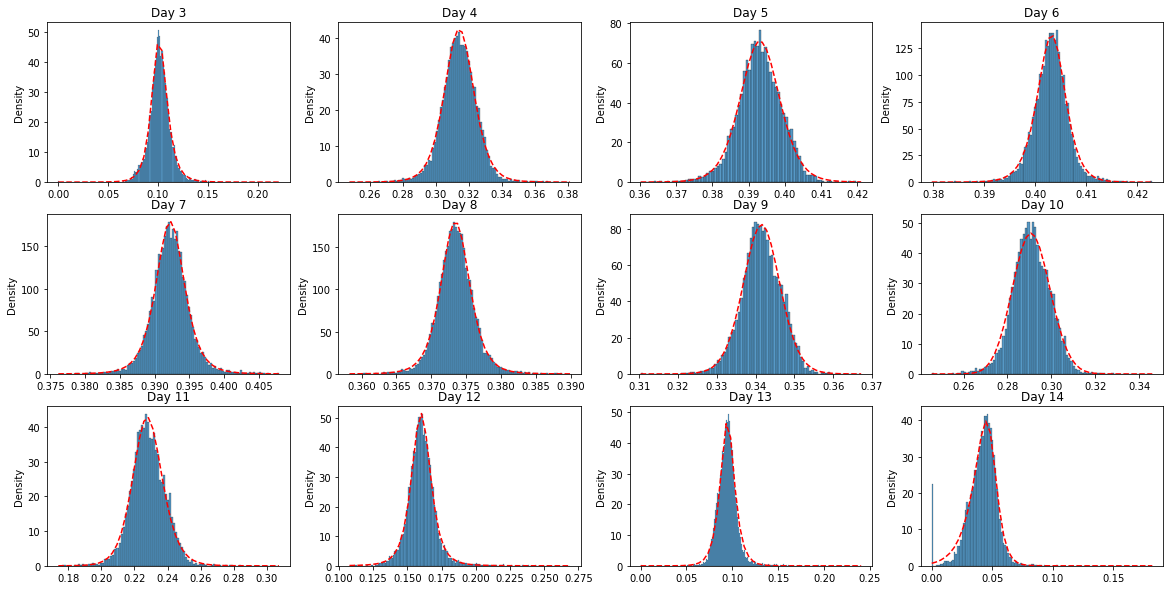

In [9]:
fig, axes = plt.subplots(3,4, figsize=(20,10))
for i,ax in enumerate(axes.flatten(),start=3):
    plot_day(i,days,ax=ax)
    
plt.show()